In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import itertools
%matplotlib inline

In [2]:
from keras.layers import *
from keras.models import *
from keras.optimizers import *
from keras.callbacks import *
import keras
from keras import backend as K

D:\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
X = np.random.rand(1000, 2)
Y = np.where((X[:, 0]-0.5)**2/9 + (X[:, 1]-0.5)**2/6 < 0.01 + np.random.randn(1000)/300, 1, 0)[:, np.newaxis]

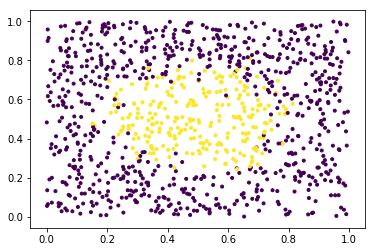

In [4]:
plt.scatter(X[:,0], X[:,1], c=Y[:,0], marker='.')

In [48]:
model_x = Input((2, ))
model_y = Dense(8, activation='relu')(model_x)
model_y = Dense(8, activation='relu')(model_y)
model_y = Dropout(0.5)(model_y)
model_y = Dense(8, activation='relu')(model_y)
model_y = Dropout(0.5)(model_y)
model_y = Dense(1, activation='sigmoid')(model_y)
model = Model(model_x, model_y)

In [49]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [51]:
hist = model.fit(X, Y, batch_size=100, epochs=200, verbose=0)
print(model.evaluate(X, Y, batch_size=1000, verbose=0))

[0.31499648094177246, 0.7490000128746033]


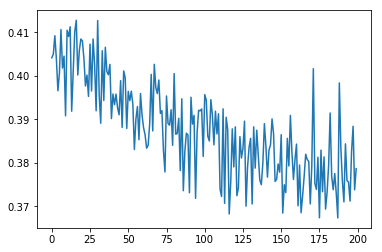

In [52]:
plt.plot(hist.history.get('loss'))

In [53]:
px, py = np.meshgrid(np.linspace(0, 1), np.linspace(0, 1))
pxy = np.vstack([px.flatten(), py.flatten()]).T
pz = model.predict(pxy).reshape(50, 50)

In [61]:
plt.contourf(px, py, pz, cmap=plt.cm.binary_r)
plt.colorbar()
plt.contour(px, py, pz, [0.5], colors='k')
plt.scatter(X[:,0], X[:,1], c=Y[:,0], marker='.')